In [32]:
import Bio
from Bio.Seq import Seq
from Bio import SeqIO
import matplotlib.pyplot as plt

In [33]:
Bio.__version__

'1.83'

### Opening SARS-Covid19 Genome Sequence FASTA file 

In [34]:
with open('covid19.fasta') as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
        print(f'sequence information: {record}')
        print(f'sequence length: {record}')

sequence information: ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
sequence length: ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


### GC content Calculation
Calculated by counting the number of Guanines and Cytosines in the sequence and then dividing that by the total length of the sequence. 

GC content is an important predictor of gene function and species ecology. 

In [35]:
from Bio.SeqUtils import gc_fraction

In [36]:
with open('covid19.fasta') as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
        print(f'GC content: {gc_fraction(record.seq) * 100}')

GC content: 37.97277865097147


### Nucleotide Content Calculation

In [37]:
with open('covid19.fasta') as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
        seq_record = record.seq
        seq_length = len(record.seq)
        
        print(f'% of A: {round(seq_record.count("A")/seq_length * 100, 2)}')
        print(f'% of T: {round(seq_record.count("T")/seq_length * 100, 2)}')
        print(f'% of G: {round(seq_record.count("G")/seq_length * 100, 2)}')
        print(f'% of C: {round(seq_record.count("C")/seq_length * 100, 2)}')

% of A: 29.94
% of T: 32.08
% of G: 19.61
% of C: 18.37


### Dinucleotide Content

In [38]:
nucleotides = ['A', 'T', 'G', 'C']
di_nucleotide_dict = {}

with open('covid19.fasta') as fh_in:
    for record in SeqIO.parse(fh_in, "fasta"):
        for n1 in nucleotides:
            for n2 in nucleotides:
                di = str(n1) + str(n2)
                di_nucleotide_dict[di] = record.seq.count(di)

print(di_nucleotide_dict)

{'AA': 2169, 'AT': 2308, 'AG': 1742, 'AC': 2023, 'TA': 2377, 'TT': 2454, 'TG': 2589, 'TC': 1413, 'GA': 1612, 'GT': 1990, 'GG': 973, 'GC': 1168, 'CA': 2084, 'CT': 2081, 'CG': 439, 'CC': 784}


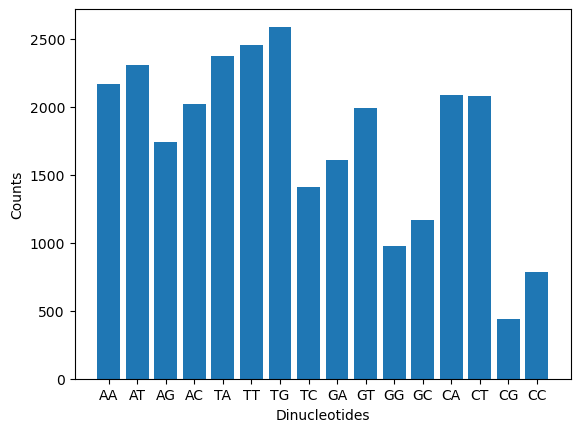

In [39]:
di = [k for k, v in di_nucleotide_dict.items()]

counts = [v for k, v in di_nucleotide_dict.items()]

# print(di_nucleotide_dict)

plt.bar(di, counts)
plt.xlabel("Dinucleotides")
plt.ylabel("Counts")
plt.show()

In [40]:
# Saving the extracted features to a dataframe

In [41]:
import numpy as np
import pandas as pd

In [42]:
nucl = ['A', 'T', 'G', 'C']
final_dict = {}

In [43]:
with open('covid19.fasta') as fh_in:
        for record in SeqIO.parse(fh_in, "fasta"):
            for n1 in nucl:
                for n2 in nucl:
                    di = str(n1) + str(n2)
                    final_dict[di] = record.seq.count(di)
            
            count_A = record.seq.count('A')
            count_T = record.seq.count('T')
            count_G = record.seq.count('G')
            count_C = record.seq.count('C')
            
            final_dict['count_A'] = round(count_A/len(record) * 100, 2)
            final_dict['count_T'] = round(count_T/len(record) * 100, 2)
            final_dict['count_G'] = round(count_G/len(record) * 100, 2)
            final_dict['count_C'] = round(count_C/len(record) * 100, 2)
            
            final_dict['GC_content'] = round(gc_fraction(record.seq), 2)
            final_dict['Size'] = len(record)

In [44]:
df = pd.DataFrame.from_dict([final_dict])
df['virus'] = "Covid19"
df.to_csv('covid19_features.csv', index = None)

In [45]:
pd.read_csv('covid19_features.csv')

,AA,AT,AG,AC,TA,TT,TG,TC,GA,GT,...,CT,CG,CC,count_A,count_T,count_G,count_C,GC_content,Size,virus
0,2169,2308,1742,2023,2377,2454,2589,1413,1612,1990,...,2081,439,784,29.94,32.08,19.61,18.37,0.38,29903,Covid19


### Finding Motifs

In [47]:
from Bio import motifs

In [48]:
my_motif = [Seq("ACGT"), Seq("TCGA"), Seq("CGGC")]

In [49]:
seq = motifs.create(my_motif)
print(seq)

ACGT
TCGA
CGGC


#### Position Frequency Matrix

In [50]:
print(seq.counts)

        0      1      2      3
A:   1.00   0.00   0.00   1.00
C:   1.00   2.00   0.00   1.00
G:   0.00   1.00   3.00   0.00
T:   1.00   0.00   0.00   1.00



In [51]:
seq.weblogo('my_motif.png')

In [52]:
import cv2

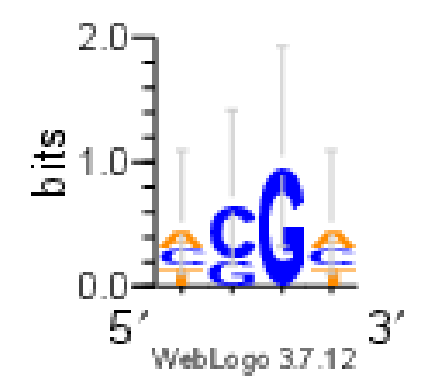

In [53]:
image = cv2.imread('my_motif.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()